<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Testes de Hipóteses (Lab)

 # **Teste de Hipóteses e Modelos Lineares**
 ## Instruções

1. Empregue para este Laboratório o **material de Teoria da Trilha 7**.  

1. **Responda as questões** à medida que você realiza o Lab. As respostas ajudaram a guiá-lo realização do Lab.

2. Execute este Lab no **Colab Google**.

## Caso: **Mais do Mercado de Imóveis de Melbourne** 

### 1. **O Mercado de Imóveis de Melbourne ficou "*esfriou*" em 2018, com preços significativamente menores que no ano anterior?** 

### 2. **Você conseguiria estimar, para um Cliente interessado em vender seu imóvel em Melbourne, o preço justo que ele deveria ser ofertado com base em suas características?** 

Empregue os dados da URL: https://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv

Essas e outras questões podem ser resolvidas com a aplicação de Testes de Hipóteses e Modelos Lineares. 

### Imports e Acesso aos Dados
Aqui você deve **importar as bibliotecas das ferramentas** que você pretende empregar na sua EDA. A seguir você deve fazer a aquisição dos dados. Lembre-se de verificar a origem dos dados para empregar as funções e parâmetros corretos de leitura dos dados (**extensão do arquivo, headers, separador**).




In [ ]:
# imports 
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

In [ ]:
# read data
houses = pd.read_csv('https://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')
houses.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Revistando os Valores Nulos

Antes de seguirmos vamos revisitar o tratamento de nulos. lembra-se de nossa análise no Lab T5. Nossa estratégia de imputar os valores, embora adequada para aquele momento, não foi uma solução tão boa. Recorda a alternativa discutida?

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


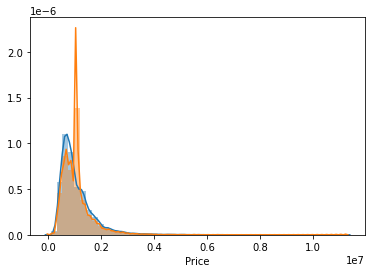

In [ ]:
print(houses.isnull().sum()) 
pr = pd.DataFrame(houses.Price.dropna())
houses.Price = houses.Price.fillna(houses.Price.mean())

sns.distplot(pr)
sns.distplot(houses.Price)

### Imputando dados com a mesma distribuição

O código aqui é talvez um pouco complexo. Fique a vontade de pular o detalhe do código. Ele não tem maior importância no que segue mas, **concentre-se no conceito e resultado que ele produz**. O mesmo preenchimento é feito para todos os dados nulos.



Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

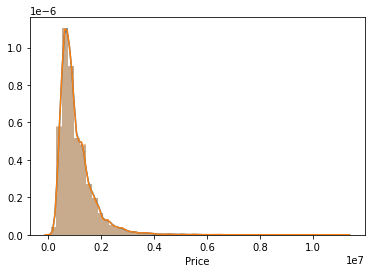

In [ ]:
houses = pd.read_csv('https://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')

def filldist(df,col):
    v = pd.DataFrame(df[col].dropna()).reset_index()
    df[col] = df[col].fillna(-1)
    df[col] = df[col].apply(lambda x: (v.iloc[np.random.randint(len(v))][col]) if x==-1 else x)
    return df[col].isnull().sum()

filldist(houses,'Price')

sns.distplot(pr)
sns.distplot(houses.Price)

s = houses.isnull().sum()
for i in s.index:
    if s[i]!=0:
        filldist(houses,i)

houses.isnull().sum()        

De qualquer modo essa estratégia, embora não apresente qualquer distorção na distribuição dos dados, ainda pode introduzir viés na análise dos dados, sendo sempre um risco a introdução artificial dos dados e, tanto maior quanto maior o número de dados introduzidos.

Assim para análise à seguir adotaremos a estratégia de simples exclusão dos dados nulos. (Veja a questão 9 para retomar essa análise). 

### Retomando os dados

Retomamos então os dados originais para análise e resposta às perguntas do caso.

In [ ]:
houses = pd.read_csv('https://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')

houses = houses.dropna()
houses.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


### **Q1.** Qual a média de preços dos imóveis por ano? 

### DICA:
1. Empregue `pd.DatetimeIndex(houses.Date).year` para criar um atributo com o ano.
2. Empregue então `df.groupby(attr).attr.mean()` 


In [ ]:
houses.dtypes
from datetime import datetime

# Você...


Year
2016    1.103024e+06
2017    1.075872e+06
2018    1.130886e+06
Name: Price, dtype: float64


### **Q2.** Alterou-se a distribuição de preços de um ano para o outro? 

### DICA:
1. Empregue `sns.distplot(x)`, sendo x a seleção de dados de Preço para um único ano
2. Você pode fazer `sns.displot()` seguidos para sobrepor os gráficos em uma mesma exibição


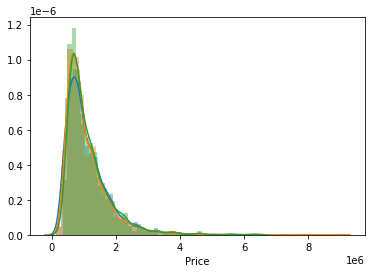

In [ ]:
# Você...


### **Q3.** Qual o % de diferença da média de Preços 2017/2018? A diferença é significativa? 

### DICA:
1. Faça um teste de hipótese, sintaxe

`s, p = stats.ttest_ind( serie1 , serie2 , equal_var=False)`

onde `serie1` e `serie2` são as séries que você deseja comparar.

2. Para valor `p < 0.05` rejeite a Hipótese Nula (médias iguais).


In [ ]:
# imports
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats

# Você... diferença % das médias? 


Diferença de preços 2018/2017: 5.11 %


In [ ]:
# Você... 

s, p = stats.ttest_ind( ... )



Rejeita a Hipótese Nula


### **Q4.** Você quer vender um imóvel em Melbourne e acredita que vendas no método 'PI' ('passed in') - digamos, com o uso de um intermediador - não tem qualquer vantagem sobre o método 'S' ('sold') - digamos, venda direta - em termos de preço e que, portanto você estaria perdendo tempo e dinheiro buscando a venda por um intermediário (digamos, corretor). Você estaria correto? 

### DICA:
1. Faça um teste de hipótese, sintaxe

`s, p = stats.ttest_ind( serie1 , serie2 , equal_var=False)`

onde `serie1` e `serie2` são as séries que você deseja comparar.

2. Para valor `p < 0.05` rejeite a Hipótese Nula (médias iguais).


In [ ]:
# Você...

Diferença de preços PI/S: 8.83 %
Rejeita a Hipótese Nula


### **Q5.** Faça um modelo linear de preço dos imóveis baseado no seu número de comôdos e área construída? Qual o resultado? 

### DICA:
1. Para um modelo linear:

```
lm = smf.ols(formula = 'Price ~ Rooms + BuildingArea', data = houses).fit()
print(lm.summary())
print(lm.params)

prediction = lm.predict(houses)
```
2. Maior R-Square (Coeficiente de Determinação, ou de Correlação, https://en.wikipedia.org/wiki/Coefficient_of_determination) melhor o modelo se ajusta ao modelo linear. 

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     1918.
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:12:45   Log-Likelihood:            -1.3036e+05
No. Observations:                8887   AIC:                         2.607e+05
Df Residuals:                    8884   BIC:                         2.607e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.146e+05   2.04e+04      5.628   

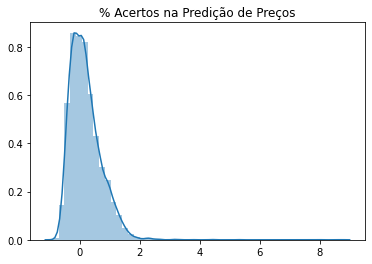

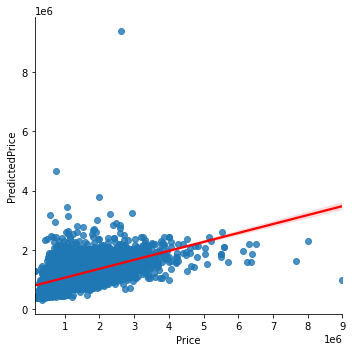

In [ ]:
import statsmodels.formula.api as smf

# Você... (basta trazer o código da DICA)



#
# Os gráficos abaixo são apenas para apresentar a você a interpretação dos resultados 
# Você pode querer pular os detalhes do código aqui
# 
sns.distplot((prediction - houses.Price)/houses.Price,kde=True)
plt.title('% Acertos na Predição de Preços')
plt.show()

df = pd.concat([houses.Price,prediction],axis=1)
df.columns = ['Price', 'PredictedPrice']

sns.lmplot('Price','PredictedPrice',data=df,line_kws={'color': 'red'})

### **Q6.** **(RESOLVIDO)** Inclua no seu modelo agora todas as variáveis numéricas e o Hot Encode de Region. Análise o resultado.  

### DICA:
1. Para um modelo linear:

```
lm = smf.ols(formula = 'Price ~ Rooms + BuildingArea', data = houses).fit()
print(lm.summary())
print(lm.params)

prediction = lm.predict(houses)
```
2. Maior R-Square (Coeficiente de Determinação, ou de Correlação, https://en.wikipedia.org/wiki/Coefficient_of_determination) melhor o modelo se ajusta ao modelo linear. 

In [ ]:
pd_dummies = pd.get_dummies(houses['Regionname'], prefix='Reg')
pd_dummies.columns

# Trata os nomes das colunas, o smf.ols não aceita brancos ou '-', você não precisará se preocupar com isso nos exercícios
new_columns = []
for col in pd_dummies.columns:
    new_columns.append(col.replace('-','_'))
pd_dummies.columns = new_columns  

new_columns = []
for col in pd_dummies.columns:
    new_columns.append(col.replace(' ','_'))
pd_dummies.columns = new_columns

houses = pd.concat([houses,pd_dummies],axis=1)
houses.iloc[0]




Suburb                                       Abbotsford
Address                                 25 Bloomburg St
Rooms                                                 2
Type                                                  h
Price                                         1.035e+06
Method                                                S
SellerG                                          Biggin
Date                                          4/02/2016
Distance                                            2.5
Postcode                                           3067
Bedroom2                                              2
Bathroom                                              1
Car                                                   0
Landsize                                            156
BuildingArea                                         79
YearBuilt                                          1900
CouncilArea                          Yarra City Council
Lattitude                                      -

Price ~ Rooms+Distance+Postcode+Bedroom2+Bathroom+Car+Landsize+BuildingArea+YearBuilt+Lattitude+Longtitude+Propertycount+Year+Reg_Eastern_Metropolitan+Reg_Eastern_Victoria+Reg_Northern_Metropolitan+Reg_Northern_Victoria+Reg_South_Eastern_Metropolitan+Reg_Southern_Metropolitan+Reg_Western_Metropolitan+Reg_Western_Victoria
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     741.3
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:12:47   Log-Likelihood:            -1.2758e+05
No. Observations:                8887   AIC:                         2.552e+05
Df Residuals:                    8866   BIC:                         2.554e+05
Df Model:                          20        

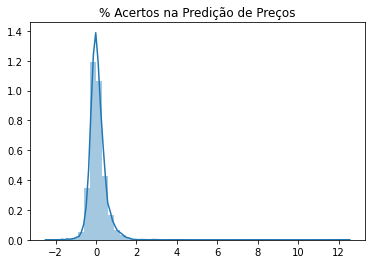

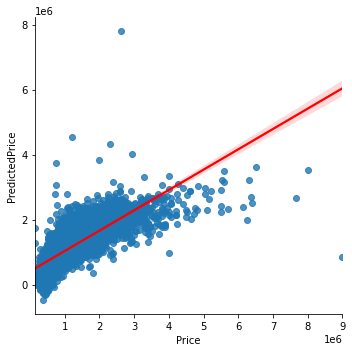

In [ ]:
formula = 'Price ~ Rooms' 

for item in houses.select_dtypes('number').columns[2::]: # skip Rooms e Price :-)
    formula = formula + '+' + item

print(formula)

lm = smf.ols(formula = formula , data = houses).fit()
print(lm.summary())
print(lm.params)

prediction = lm.predict(houses)

#
# Os gráficos abaixo são apenas para apresentar a você a interpretação dos resultados 
# Você pode querer pular os detalhes do código aqui
# 
sns.distplot((prediction - houses.Price)/houses.Price,kde=True)
plt.title('% Acertos na Predição de Preços')
plt.show()

df = pd.concat([houses.Price,prediction],axis=1)
df.columns = ['Price', 'PredictedPrice']

sns.lmplot('Price','PredictedPrice',data=df,line_kws={'color': 'red'})

### **Q7.** Altere o código anterior para a estimativa do **log** do preço dos imóveis. Qual o resultado? 

### DICA:
1. Para um modelo linear:

```
lm = smf.ols(formula = 'np.log(Price) ... ', data = houses).fit()
print(lm.summary())
print(lm.params)

prediction = lm.predict(houses)
```

2. Ajuste as saídas de `price` para `np.logprice` no código anterior.


np.log(Price) ~ Rooms+Distance+Postcode+Bedroom2+Bathroom+Car+Landsize+BuildingArea+YearBuilt+Lattitude+Longtitude+Propertycount+Year+Reg_Eastern_Metropolitan+Reg_Eastern_Victoria+Reg_Northern_Metropolitan+Reg_Northern_Victoria+Reg_South_Eastern_Metropolitan+Reg_Southern_Metropolitan+Reg_Western_Metropolitan+Reg_Western_Victoria
                            OLS Regression Results                            
Dep. Variable:          np.log(Price)   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     1033.
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:12:48   Log-Likelihood:                -1702.1
No. Observations:                8887   AIC:                             3446.
Df Residuals:                    8866   BIC:                             3595.
Df Model:                          20

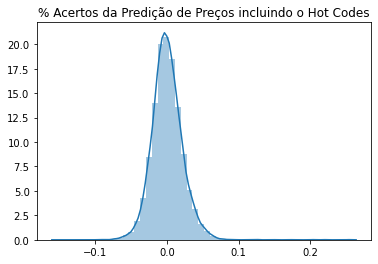

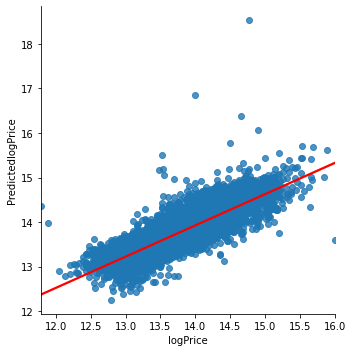

In [ ]:
# Você...

#
# Os gráficos abaixo são apenas para apresentar a você a interpretação dos resultados 
# Você pode querer pular os detalhes do código aqui
# 
sns.distplot((prediction - np.log(houses.Price))/np.log(houses.Price),kde=True)
plt.title('% Acertos da Predição de Preços incluindo o Hot Codes')
plt.show()

df = pd.concat([np.log(houses.Price),prediction],axis=1)
df.head()
df.columns = ['logPrice', 'PredictedlogPrice']

sns.lmplot('logPrice','PredictedlogPrice',data=df,line_kws={'color': 'red'})

### **Q8.** Tente você. Acrescente o tipo do imóvel no modelo. 

DICA:
1. Inicie fazendo o Hot Encode de `type` à exemplo de `Regionname`
2. Retome então à partir daí 

In [ ]:
# Você... Hot Encode de Type

Suburb                                       Abbotsford
Address                                 25 Bloomburg St
Rooms                                                 2
Type                                                  h
Price                                         1.035e+06
Method                                                S
SellerG                                          Biggin
Date                                          4/02/2016
Distance                                            2.5
Postcode                                           3067
Bedroom2                                              2
Bathroom                                              1
Car                                                   0
Landsize                                            156
BuildingArea                                         79
YearBuilt                                          1900
CouncilArea                          Yarra City Council
Lattitude                                      -

np.log(Price) ~ Rooms+Distance+Postcode+Bedroom2+Bathroom+Car+Landsize+BuildingArea+YearBuilt+Lattitude+Longtitude+Propertycount+Year+Reg_Eastern_Metropolitan+Reg_Eastern_Victoria+Reg_Northern_Metropolitan+Reg_Northern_Victoria+Reg_South_Eastern_Metropolitan+Reg_Southern_Metropolitan+Reg_Western_Metropolitan+Reg_Western_Victoria+Type_h+Type_t+Type_u
                            OLS Regression Results                            
Dep. Variable:          np.log(Price)   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1298.
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:12:49   Log-Likelihood:                -648.12
No. Observations:                8887   AIC:                             1342.
Df Residuals:                    8864   BIC:                             1505.
Df Model:       

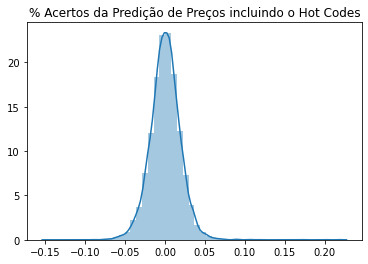

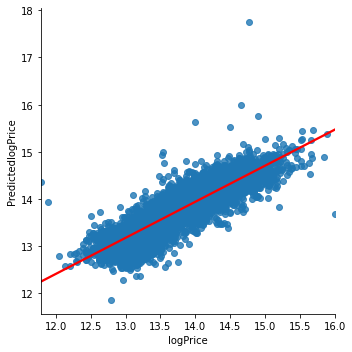

In [ ]:
# Você... modelo Linear

#
# Os gráficos abaixo são apenas para apresentar a você a interpretação dos resultados 
# Você pode querer pular os detalhes do código aqui
# 
sns.distplot((prediction - np.log(houses.Price))/np.log(houses.Price),kde=True)
plt.title('% Acertos da Predição de Preços incluindo o Hot Codes')
plt.show()

df = pd.concat([np.log(houses.Price),prediction],axis=1)
df.head()
df.columns = ['logPrice', 'PredictedlogPrice']

sns.lmplot('logPrice','PredictedlogPrice',data=df,line_kws={'color': 'red'})

### Conclusão dos Modelos Lineares

> `Price ~ Rooms + BuildingArea` R-Square **0.30**

> `+ Hot Encode(Regionname) + Numeric Attr` R-Square **0.62**

> `+ log(Price)` R-Square **0.70**

> `+ Hot Encode(Type)` R-Square **0.76**




### **Q9**. Elimine ou comente a célula que executa o `dropna()` e reexecute o notebook. O processamento será feito então com a estratégia de se imputar todos os dados nulos. Como os resultados diferem da análise com os dados nulos excluídos? O modelo obtido é mais ou menos linear? 

Veja o `R-Square` e `sns.lmplot()` produzidos no último modelo e verifique que o modelo é bem menos linear que o anterior.